# Predicting Multiple Sclerosis from Dynamics of Gait Variability - A Deep Learning Approach
### Traditional ML algorithms on task generalization framework namely W-> WT to classify HOA/MS sequences of strides and subjects 

1. We use the raw, size-N and regress-N data for this analysis.
2. Save the optimal hyperparameters, confusion matrices and ROC curves for each algorithm.
3. Make sure to shuffle the sample and normalize (z-score normalization) the features before we feed them to the model.
4. We use the summary statistics mean and standard deviation as the features to input to the traditional models requiring fixed size 1D input for each training/testing set sample.

In [15]:
from importlib import reload
import utils.utils_traditional_methods
reload(utils.utils_traditional_methods)
from utils.utils_traditional_methods import normalize, extract_features_labels_task_generalize, models_task_generalize
from utils.utils_traditional_methods import plotROC_task_generalize
from utils.package_imports import *

### Reading, shuffling and normalizing the raw, size-N and regress-N summary statistics data

In [16]:
#Raw data 
print ('raw data')
trainX_raw, trainY_raw, testX_raw, testY_raw = extract_features_labels_task_generalize("data/summary_statistics_raw_data_5strides.csv")

#Size-N data
print ('\nsize-N data')
trainX_sizeN, trainY_sizeN, testX_sizeN, testY_sizeN = extract_features_labels_task_generalize("data/summary_statistics_sizeN_data_5strides.csv")

#Regress-N data
print ('\nregress-N data')
trainX_regressN, trainY_regressN, testX_regressN, testY_regressN = extract_features_labels_task_generalize("data/summary_statistics_regressN_data_5strides.csv")

raw data
TrainX shape:  (736, 42)


,LeftFPA_mean,RightFPA_mean,Butterfly_x_abs_mean,ButterflySQ_x_mean,DS_R_mean,SS_R_mean,DS_L_mean,force_HSR_mean,force_MidSSR_mean,force_TOR_mean,...,force_TOL_std,force_MidSSL_std,stride_time_std,swing_time_std,stance_time_std,stride_length_std,stride_width_std,stride_speed_std,cadence_std,walk_ratio_std
196,-0.520603,-0.373316,-0.390014,-0.202612,-0.395228,0.044071,-0.206556,-0.981578,-0.520811,-0.916672,...,0.140722,-0.874609,0.556344,0.996734,0.322400,2.387733,-0.575374,1.028455,1.337202,1.696040
187,0.225957,0.792641,-0.262979,-0.522554,0.176485,-0.002069,0.198472,1.825144,1.924392,2.085919,...,-0.531415,-0.710134,-0.661075,-0.747121,-0.398810,-0.915671,-0.725701,-0.958949,-0.883230,-0.688325
14,0.814236,0.062830,-1.332268,-0.552559,0.280885,-0.205082,-0.086012,-0.386984,0.006382,-0.321667,...,0.427778,-0.674689,0.028844,-0.001721,-0.340126,-0.588345,-0.214218,-0.587616,0.082848,-0.153619
31,0.492653,0.298147,-0.519033,-0.534239,1.707683,0.560832,1.109785,1.226007,1.519833,1.612465,...,-1.000513,-0.695334,-0.025114,-0.420194,-0.046439,-0.690286,-0.646040,-0.680230,-0.405342,-0.458064
391,0.037469,0.035545,-0.494323,-0.260509,-0.643799,-0.491146,-0.491040,-0.929963,-0.779525,-0.612583,...,0.337289,0.840264,-0.617134,-1.053832,-0.623236,-0.046349,-0.192521,-0.203082,-0.658643,-0.217567


TrainY shape:  (736, 2)
TestX shape:  (700, 42)


,LeftFPA_mean,RightFPA_mean,Butterfly_x_abs_mean,ButterflySQ_x_mean,DS_R_mean,SS_R_mean,DS_L_mean,force_HSR_mean,force_MidSSR_mean,force_TOR_mean,...,force_TOL_std,force_MidSSL_std,stride_time_std,swing_time_std,stance_time_std,stride_length_std,stride_width_std,stride_speed_std,cadence_std,walk_ratio_std
1042,-0.246292,0.160342,-0.978214,-0.525604,-0.439971,-1.524669,-0.182447,1.014010,0.113115,0.592678,...,-0.575197,-0.383506,-0.655817,-0.887765,-0.781509,-0.995368,-0.220653,-1.126725,-0.676167,-0.683418
1340,-0.665683,-0.051487,1.786225,1.509938,-0.733284,0.874580,-0.789989,-0.968002,-0.751260,-1.073315,...,0.402927,0.039326,-0.440998,-0.505410,-0.749923,-1.028233,0.737714,-0.570285,-0.433272,-0.518601
776,-0.094770,0.196289,-0.487265,-0.531189,1.633112,1.520532,1.649822,-0.928837,-0.466497,-0.816851,...,-0.049963,-0.085278,0.534568,1.662820,-0.208411,-0.491850,-0.421200,-0.835764,-0.154419,0.351180
1229,-0.859867,-0.298469,-0.012480,0.239115,-0.966941,-0.703388,-0.968394,-0.069728,-1.079027,0.190839,...,2.405742,0.229506,-0.463410,0.199467,-0.510770,-0.651635,1.245053,-0.552309,-0.150384,-0.313594
750,0.692975,-0.170920,-0.690823,-0.413770,-0.400199,-0.048208,-0.298170,-0.442877,-0.033094,-0.300414,...,-0.291862,-0.582227,-0.431566,-0.509916,-0.565996,-0.550990,0.442854,-0.515238,-0.376590,-0.445621


TestY shape:  (700, 2)

size-N data
TrainX shape:  (736, 42)


,stride_length_mean,stride_width_mean,DS_R_mean,SS_R_mean,DS_L_mean,stride_time_mean,stance_time_mean,swing_time_mean,force_HSR_mean,force_MidSSR_mean,...,force_HSL_std,force_TOL_std,force_MidSSL_std,cadence_std,stride_speed_std,walk_ratio_std,LeftFPA_std,RightFPA_std,Butterfly_x_abs_std,ButterflySQ_x_std
196,-0.491025,-1.106937,-0.343221,0.250112,-0.149766,-0.130769,-0.173727,0.109679,-0.358375,-0.068831,...,-0.781271,0.347435,-0.734636,1.264108,1.090795,1.925135,0.182965,0.657570,-0.551031,-0.481499
187,-0.078798,1.208157,0.130908,-0.151755,0.151761,0.070280,0.098626,-0.078074,-0.342376,-0.069270,...,-0.787512,-0.926602,-1.073494,-0.872421,-0.968316,-0.709610,-0.614840,-0.539274,-1.007532,-0.476168
14,-0.107933,1.750946,0.362363,0.029859,-0.016715,0.422722,0.172604,1.060242,-0.479354,-0.176122,...,-0.352712,0.213476,-0.738927,0.040817,-0.567098,-0.068173,-0.361694,-0.125083,0.521024,0.000160
31,-1.054465,-0.218961,1.675981,0.480336,1.075353,1.547588,1.457966,0.877053,-0.245413,0.079615,...,-1.156804,-1.122639,-0.969982,-0.397438,-0.687485,-0.472916,0.062784,-0.307310,-0.838976,-0.584976
391,0.866266,-0.124086,-0.678624,-0.638477,-0.525045,-0.722755,-0.749340,-0.160674,-0.317314,-0.278325,...,1.443762,0.547300,1.134546,-0.644797,-0.223298,-0.259822,-0.296341,-0.200264,-0.746682,-0.564302


TrainY shape:  (736, 2)
TestX shape:  (700, 42)


,stride_length_mean,stride_width_mean,DS_R_mean,SS_R_mean,DS_L_mean,stride_time_mean,stance_time_mean,swing_time_mean,force_HSR_mean,force_MidSSR_mean,...,force_HSL_std,force_TOL_std,force_MidSSL_std,cadence_std,stride_speed_std,walk_ratio_std,LeftFPA_std,RightFPA_std,Butterfly_x_abs_std,ButterflySQ_x_std
1042,-0.068199,-0.008112,-0.477966,-1.653666,-0.223030,-0.954974,-0.765714,-1.028428,0.016252,-0.389177,...,-0.055701,-0.739419,-0.625126,-0.662531,-1.134040,-0.705758,-0.468014,-0.338838,-0.354384,-0.483726
1340,1.831295,-1.237303,-0.658480,1.264752,-0.714954,-0.048686,-0.342712,1.052081,-0.279549,-0.199167,...,-0.461350,0.670395,0.310567,-0.469412,-0.538867,-0.444682,-0.024372,-0.394450,-1.125022,-0.569911
776,-0.479082,0.100218,1.688217,1.640822,1.694480,2.439796,2.070159,2.213217,-0.024588,0.238091,...,-0.973932,0.344174,0.319411,-0.170257,-0.831558,0.413378,0.007383,-0.417336,-0.336072,-0.500318
1229,1.228801,-1.178596,-1.008916,-0.907393,-1.004111,-1.339169,-1.214047,-0.931956,0.080548,-0.686873,...,-0.835973,2.293462,0.287841,-0.120982,-0.573779,-0.368711,0.117715,-0.149559,-0.772472,-0.559779
750,0.109141,1.266521,-0.339373,0.191131,-0.234026,-0.237279,-0.228873,-0.115067,-0.515581,-0.202165,...,-1.000395,-0.382665,-0.656818,-0.403410,-0.492404,-0.388619,0.137289,0.317305,-0.034692,-0.405944


TestY shape:  (700, 2)

regress-N data
TrainX shape:  (736, 42)


,ButterflySQ_x_mean,Butterfly_x_abs_mean,DS_L_mean,DS_R_mean,LeftFPA_mean,RightFPA_mean,SS_R_mean,cadence_mean,force_HSL_mean,force_HSR_mean,...,force_MidSSR_std,force_TOL_std,force_TOR_std,stance_time_std,stride_length_std,stride_speed_std,stride_time_std,stride_width_std,swing_time_std,walk_ratio_std
196,-0.409745,-0.432082,-0.132046,-0.340386,-0.332359,-0.559085,0.062445,0.011957,-0.333941,-0.324277,...,-0.701017,0.390792,0.618130,0.334480,2.343325,0.990954,0.590135,-0.420891,1.019587,1.663325
187,-0.472719,-1.002075,0.137427,0.129023,-0.031781,0.112256,-0.055618,-0.249611,-0.277714,-0.354161,...,-0.722670,-0.963869,-0.326772,-0.415837,-0.902093,-0.940853,-0.664603,-1.076646,-0.731608,-0.676925
14,0.073585,0.425948,0.004601,0.366356,0.327055,0.081935,-0.186795,-0.593504,-0.535383,-0.449698,...,-0.536310,0.283899,-0.627870,-0.332540,-0.592253,-0.596728,0.055223,-0.370501,0.013407,-0.163246
31,-0.628554,-1.013670,1.064168,1.675296,0.283728,0.125955,0.579387,-1.567204,-0.171719,-0.261191,...,-1.081691,-1.152891,-0.951107,-0.036860,-0.692807,-0.687715,-0.030973,-0.805613,-0.444585,-0.463890
391,-0.574828,-0.628862,-0.534856,-0.680002,-1.153678,-0.054562,-0.472959,0.745540,-0.163156,-0.287680,...,-0.142123,0.603455,-0.002274,-0.617571,-0.057634,-0.218948,-0.621583,0.154160,-1.067807,-0.226395


TrainY shape:  (736, 2)
TestX shape:  (700, 42)


,ButterflySQ_x_mean,Butterfly_x_abs_mean,DS_L_mean,DS_R_mean,LeftFPA_mean,RightFPA_mean,SS_R_mean,cadence_mean,force_HSL_mean,force_HSR_mean,...,force_MidSSR_std,force_TOL_std,force_TOR_std,stance_time_std,stride_length_std,stride_speed_std,stride_time_std,stride_width_std,swing_time_std,walk_ratio_std
1042,-0.528283,-0.152177,-0.235146,-0.479504,-0.097303,0.127362,-1.566115,1.091953,0.070948,-0.021972,...,-0.981324,-0.791191,-0.615194,-0.786777,-0.983063,-1.114395,-0.659646,-0.377265,-0.878453,-0.671901
1340,-0.544415,-0.545377,-0.691559,-0.655411,0.216967,0.022787,0.893245,-0.082557,-0.235888,-0.251465,...,-0.334935,0.728618,-0.253324,-0.745117,-1.026155,-0.579701,-0.419988,1.491688,-0.488734,-0.523672
776,-0.531946,-0.282888,1.707103,1.691849,0.075682,-0.830206,1.539422,-2.141990,0.008976,-0.014914,...,-0.367130,0.366267,-1.123500,-0.199932,-0.497071,-0.840516,0.552156,-0.165577,1.658898,0.335252
1229,-0.570077,-0.727726,-1.014137,-1.010914,0.878865,0.191041,-0.751362,1.739034,-0.204506,0.057334,...,0.635447,2.222398,3.304714,-0.524356,-0.633839,-0.520237,-0.473960,1.626295,0.239433,-0.293286
750,-0.359424,-0.276327,-0.214077,-0.336304,0.278236,0.010903,-0.029866,0.127607,-0.436243,-0.481742,...,-0.937409,-0.361765,-1.135183,-0.559943,-0.555407,-0.525620,-0.416440,0.140025,-0.503531,-0.451602


TestY shape:  (700, 2)


In [17]:
np.sort(trainY_raw.PID.unique())

array([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 214,
       215, 216, 217, 218, 219, 300, 301, 302, 303, 304, 305, 306, 307,
       308, 312, 313, 314, 318, 320, 321, 322, 323], dtype=int64)

In [18]:
np.sort(testY_raw.PID.unique())

array([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 214,
       215, 216, 217, 218, 219, 300, 301, 302, 303, 304, 305, 306, 307,
       308, 312, 313, 314, 318, 320, 321, 322, 323], dtype=int64)

### Traditional ML models for raw summary features 

In [19]:
data_type = 'raw_data'
ml_models = ['logistic_regression', 'random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'decision_tree',  \
             'linear_svm', 'mlp']
metrics_raw = pd.DataFrame(columns = ml_models) #Dataframe to store accuracies for each ML model for raw data                                                       #For storing predicted probabilities for person (for class 1) to show ROC curves 
predicted_probs_person_raw = pd.DataFrame(columns = ml_models) 

results_dir = '5strides/' #Depends on how many strides per sequence were selected for computing summary statistics 

logistic_regression
Stride-based model performance:  0.7214285714285714 0.7208333333333333 0.574750830564784 0.6395563770794824 0.8019800331393266
LogisticRegression(random_state=0)
Person-based model performance:  0.7714285714285715 0.8461538461538461 0.6470588235294118 0.7333333333333334 0.8856209150326797


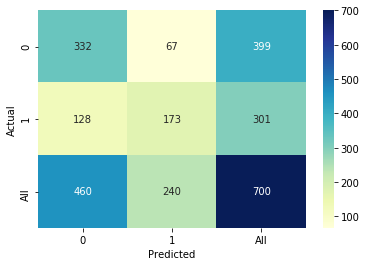

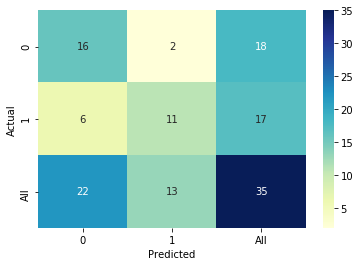

random_forest
Stride-based model performance:  0.8071428571428572 0.7694805194805194 0.7873754152823921 0.7783251231527094 0.9060733228419887
RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=2,
                       n_estimators=45, random_state=0)
Person-based model performance:  0.8571428571428571 0.8333333333333334 0.8823529411764706 0.8571428571428571 0.9444444444444444


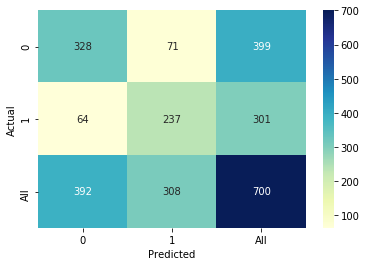

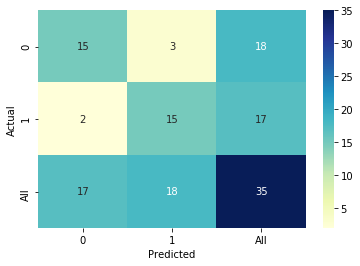

adaboost
Stride-based model performance:  0.5142857142857142 0.41841004184100417 0.33222591362126247 0.3703703703703704 0.5470112157470088
AdaBoostClassifier(learning_rate=2, n_estimators=100, random_state=0)
Person-based model performance:  0.5714285714285714 0.5833333333333334 0.4117647058823529 0.4827586206896552 0.522875816993464


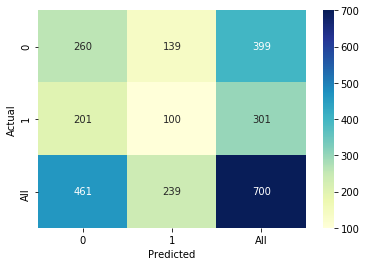

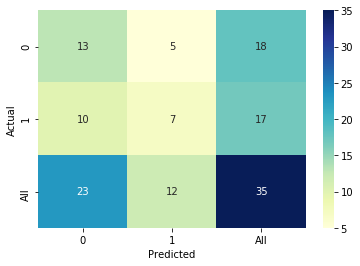

kernel_svm
Stride-based model performance:  0.57 0.0 0.0 0.0 0.6007252350144464
SVC(gamma=0.0001, probability=True, random_state=0)
Person-based model performance:  0.5142857142857142 0.0 0.0 0.0 0.5


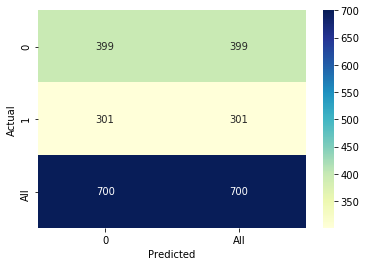

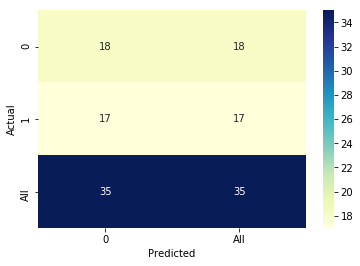

gbm
Stride-based model performance:  0.8271428571428572 0.7848101265822784 0.8239202657807309 0.8038897893030794 0.93531170117986
GradientBoostingClassifier(learning_rate=0.15, max_depth=7, max_features=6,
                           min_samples_leaf=3, n_estimators=50, random_state=0)
Person-based model performance:  0.8857142857142857 0.8421052631578947 0.9411764705882353 0.8888888888888888 0.9673202614379085


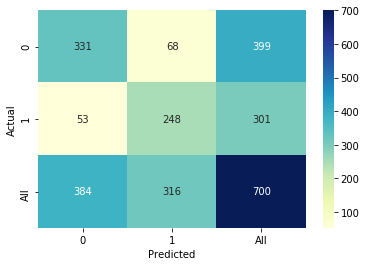

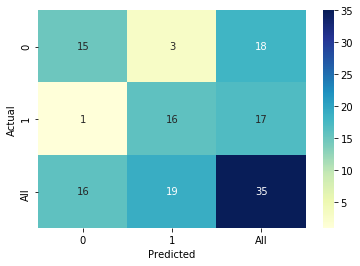

xgboost
Stride-based model performance:  0.7971428571428572 0.758957654723127 0.7740863787375415 0.7664473684210525 0.9032797941698099
XGBClassifier(colsample_bytree=0.6, gamma=0.5, max_depth=7, min_child_weight=5,
              subsample=0.6)
Person-based model performance:  0.8285714285714286 0.8235294117647058 0.8235294117647058 0.8235294117647058 0.869281045751634


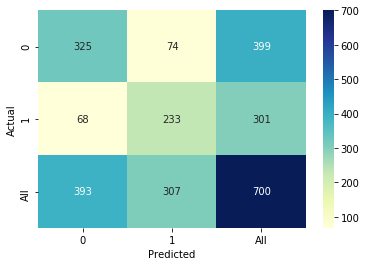

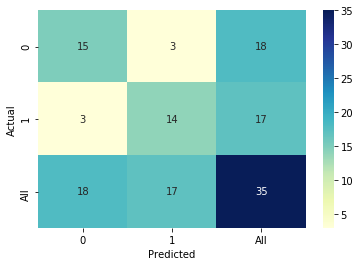

decision_tree
Stride-based model performance:  0.7471428571428571 0.7052980132450332 0.707641196013289 0.7064676616915423 0.7725168402734411
DecisionTreeClassifier(min_samples_split=26, random_state=0)
Person-based model performance:  0.8285714285714286 0.8235294117647058 0.8235294117647058 0.8235294117647058 0.8774509803921569


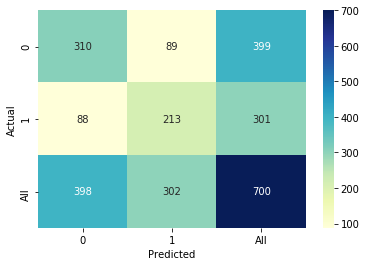

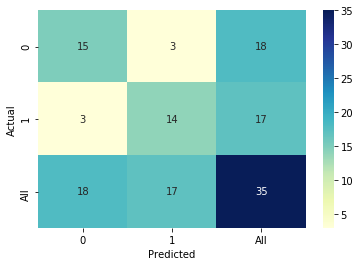

linear_svm
Stride-based model performance:  0.73 0.7393162393162394 0.574750830564784 0.6467289719626169 0.8073339494916694
LinearSVC(random_state=0)
Person-based model performance:  0.7714285714285715 0.9090909090909091 0.5882352941176471 0.7142857142857143 0.8937908496732025


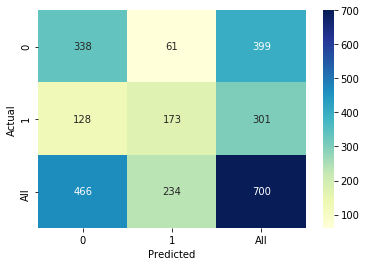

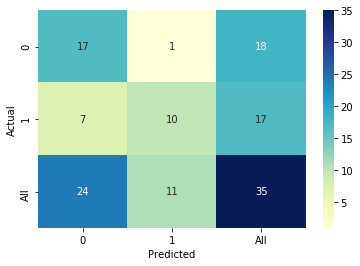

mlp
Stride-based model performance:  0.57 0.0 0.0 0.0 0.5
MLPClassifier(hidden_layer_sizes=(50, 50, 50, 10, 50, 20, 150, 5, 10),
              learning_rate='adaptive', max_iter=500, random_state=0,
              shuffle=False)
Person-based model performance:  0.5142857142857142 0.0 0.0 0.0 0.5


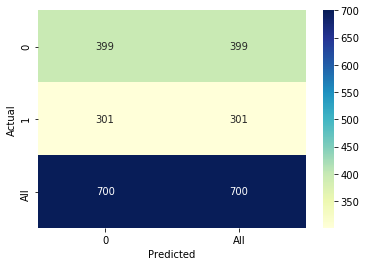

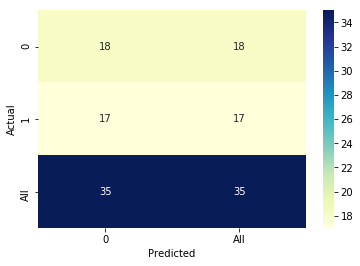

In [20]:
for ml_model in ml_models:
    print (ml_model)
    predict_probs_person_raw, stride_person_metrics_raw = models_task_generalize(trainX_raw, trainY_raw, testX_raw, testY_raw, ml_model, data_type, results_dir)  
    metrics_raw[ml_model] = stride_person_metrics_raw
    predicted_probs_person_raw[ml_model] = predict_probs_person_raw

metrics_raw.index = ['sequence_accuracy', 'sequence_precision', 'sequence_recall', 'sequence_F1', 'sequence_AUC', 'person_accuracy', 
                     'person_precision', 'person_recall', 'person_F1', 'person_AUC']  
#Saving the sequence and subject-wise metrics and predicted person wise probabilities to csv files 
metrics_raw.to_csv(results_path_task_generalize_trad + results_dir + 'task_generalize_raw_data_traditional_result_metrics.csv')
predicted_probs_person_raw.to_csv(results_path_task_generalize_trad + results_dir + 'task_generalize_raw_data_traditional_prediction_probs.csv')

In [21]:
metrics_raw

,logistic_regression,random_forest,adaboost,kernel_svm,gbm,xgboost,decision_tree,linear_svm,mlp
sequence_accuracy,0.721429,0.807143,0.514286,0.570000,0.827143,0.797143,0.747143,0.730000,0.570000
sequence_precision,0.720833,0.769481,0.418410,0.000000,0.784810,0.758958,0.705298,0.739316,0.000000
sequence_recall,0.574751,0.787375,0.332226,0.000000,0.823920,0.774086,0.707641,0.574751,0.000000
sequence_F1,0.639556,0.778325,0.370370,0.000000,0.803890,0.766447,0.706468,0.646729,0.000000
sequence_AUC,0.801980,0.906073,0.547011,0.600725,0.935312,0.903280,0.772517,0.807334,0.500000
person_accuracy,0.771429,0.857143,0.571429,0.514286,0.885714,0.828571,0.828571,0.771429,0.514286
person_precision,0.846154,0.833333,0.583333,0.000000,0.842105,0.823529,0.823529,0.909091,0.000000
person_recall,0.647059,0.882353,0.411765,0.000000,0.941176,0.823529,0.823529,0.588235,0.000000
person_F1,0.733333,0.857143,0.482759,0.000000,0.888889,0.823529,0.823529,0.714286,0.000000
person_AUC,0.885621,0.944444,0.522876,0.500000,0.967320,0.869281,0.877451,0.893791,0.500000


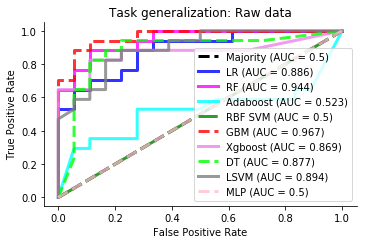

In [23]:
#Plotting the person-wise ROC curves
plotROC_task_generalize(ml_models, testY_raw, predicted_probs_person_raw, metrics_raw.loc['person_AUC'], data_type = 'raw_data', results_dir = results_dir)

### Traditional ML models for size-N summary features 

In [24]:
data_type = 'sizeN_data'
ml_models = ['logistic_regression', 'random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'decision_tree',  \
             'linear_svm', 'mlp']
metrics_sizeN = pd.DataFrame(columns = ml_models) #Dataframe to store accuracies for each ML model for size-N data                                                       #For storing predicted probabilities for person (for class 1) to show ROC curves 
predicted_probs_person_sizeN = pd.DataFrame(columns = ml_models) 

logistic_regression
Stride-based model performance:  0.7242857142857143 0.7213114754098361 0.584717607973422 0.6458715596330276 0.8037036111874369
LogisticRegression(random_state=0)
Person-based model performance:  0.8285714285714286 1.0 0.6470588235294118 0.7857142857142858 0.857843137254902


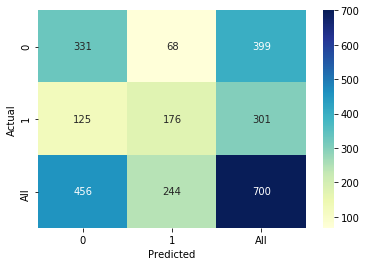

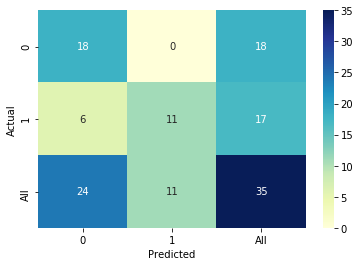

random_forest
Stride-based model performance:  0.79 0.7769784172661871 0.717607973421927 0.7461139896373058 0.8841580695925861
RandomForestClassifier(max_depth=20, max_features='log2', n_estimators=40,
                       random_state=0)
Person-based model performance:  0.8285714285714286 0.8666666666666667 0.7647058823529411 0.8125 0.9264705882352942


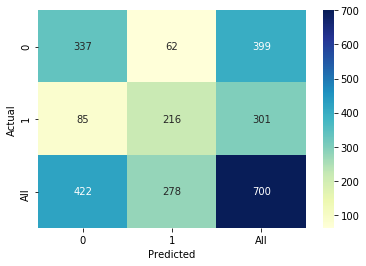

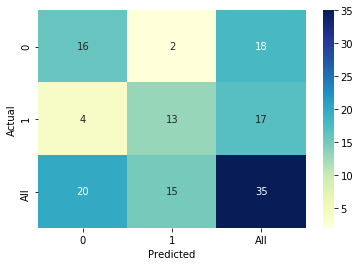

adaboost
Stride-based model performance:  0.3242857142857143 0.315450643776824 0.4883720930232558 0.3833116036505867 0.3293574467730789
AdaBoostClassifier(learning_rate=2, random_state=0)
Person-based model performance:  0.2571428571428571 0.2631578947368421 0.29411764705882354 0.27777777777777773 0.2598039215686274


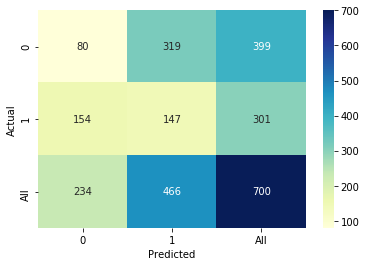

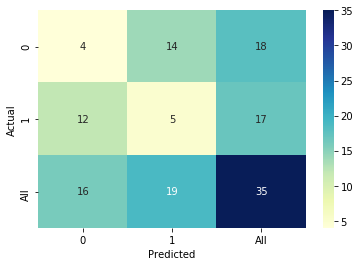

kernel_svm
Stride-based model performance:  0.6328571428571429 0.8666666666666667 0.17275747508305647 0.28808864265927975 0.6477239610654544
SVC(gamma=0.001, probability=True, random_state=0)
Person-based model performance:  0.6571428571428571 1.0 0.29411764705882354 0.45454545454545453 0.696078431372549


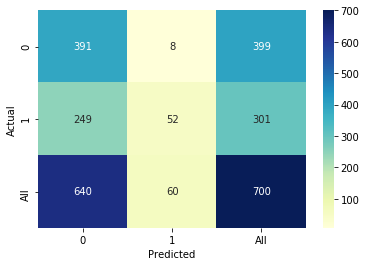

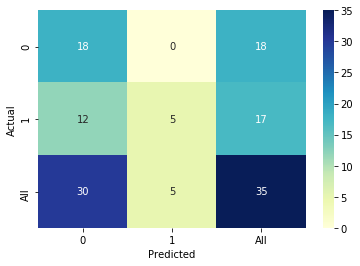

gbm
Stride-based model performance:  0.8028571428571428 0.8171206225680934 0.6976744186046512 0.7526881720430108 0.8920057619130884
GradientBoostingClassifier(max_depth=4, max_features=4, min_samples_leaf=3,
                           random_state=0)
Person-based model performance:  0.8571428571428571 1.0 0.7058823529411765 0.8275862068965517 0.9673202614379085


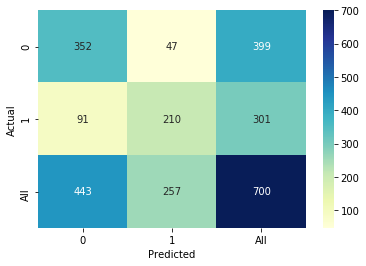

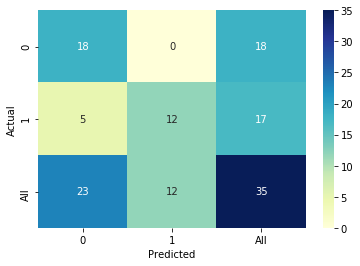

xgboost
Stride-based model performance:  0.7985714285714286 0.7962962962962963 0.7142857142857143 0.7530647985989493 0.8945536598972514
XGBClassifier(colsample_bytree=0.6, gamma=0.5, max_depth=8, subsample=0.6)
Person-based model performance:  0.8857142857142857 0.9333333333333333 0.8235294117647058 0.8749999999999999 0.977124183006536


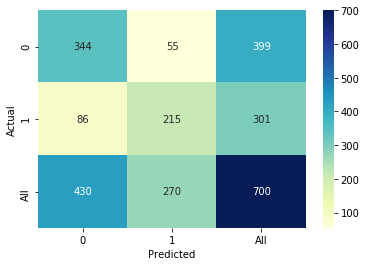

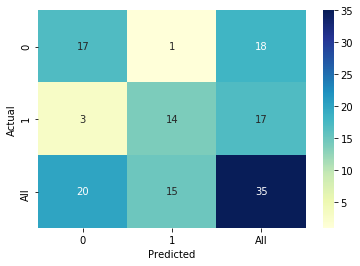

decision_tree
Stride-based model performance:  0.7314285714285714 0.6982456140350877 0.6611295681063123 0.6791808873720137 0.7587989908325632
DecisionTreeClassifier(min_samples_split=29, random_state=0)
Person-based model performance:  0.8857142857142857 0.8823529411764706 0.8823529411764706 0.8823529411764706 0.9183006535947712


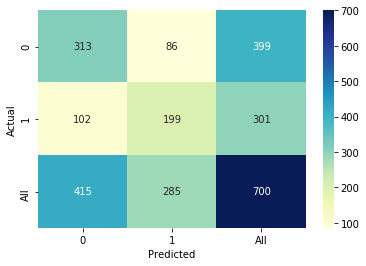

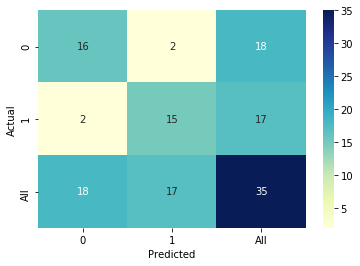

linear_svm
Stride-based model performance:  0.7185714285714285 0.7203389830508474 0.5647840531561462 0.633147113594041 0.7936702220667948
LinearSVC(random_state=0)
Person-based model performance:  0.8 0.9166666666666666 0.6470588235294118 0.7586206896551724 0.8088235294117647


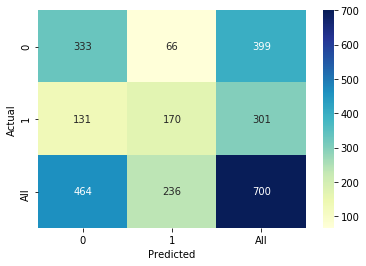

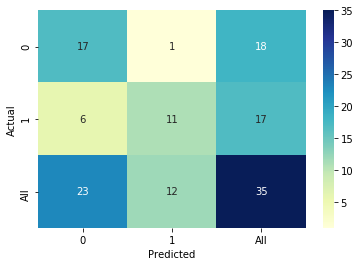

mlp
Stride-based model performance:  0.7785714285714286 0.7354838709677419 0.7574750830564784 0.746317512274959 0.8254898042448314
MLPClassifier(hidden_layer_sizes=(50, 50, 5, 5, 200, 100, 50, 30),
              learning_rate='adaptive', max_iter=500, random_state=0,
              shuffle=False)
Person-based model performance:  0.9142857142857143 0.9375 0.8823529411764706 0.9090909090909091 0.9297385620915033


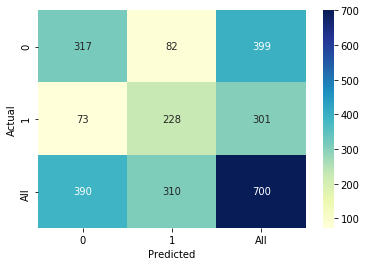

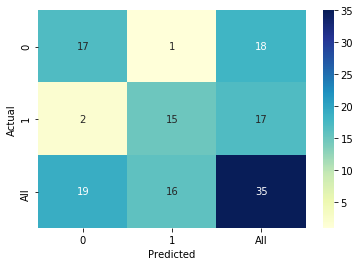

In [25]:
for ml_model in ml_models:
    print (ml_model)
    predict_probs_person_sizeN, stride_person_metrics_sizeN = models_task_generalize(trainX_sizeN, trainY_sizeN, testX_sizeN, testY_sizeN, ml_model, data_type, results_dir)  
    metrics_sizeN[ml_model] = stride_person_metrics_sizeN
    predicted_probs_person_sizeN[ml_model] = predict_probs_person_sizeN

metrics_sizeN.index = ['sequence_accuracy', 'sequence_precision', 'sequence_recall', 'sequence_F1', 'sequence_AUC', 'person_accuracy', 
                     'person_precision', 'person_recall', 'person_F1', 'person_AUC']  
#Saving the sequence and subject-wise metrics and predicted person wise probabilities to csv files 
metrics_sizeN.to_csv(results_path_task_generalize_trad+ results_dir +'task_generalize_sizeN_data_traditional_result_metrics.csv')
predicted_probs_person_sizeN.to_csv(results_path_task_generalize_trad + results_dir + 'task_generalize_sizeN_data_traditional_prediction_probs.csv')

In [26]:
metrics_sizeN

,logistic_regression,random_forest,adaboost,kernel_svm,gbm,xgboost,decision_tree,linear_svm,mlp
sequence_accuracy,0.724286,0.790000,0.324286,0.632857,0.802857,0.798571,0.731429,0.718571,0.778571
sequence_precision,0.721311,0.776978,0.315451,0.866667,0.817121,0.796296,0.698246,0.720339,0.735484
sequence_recall,0.584718,0.717608,0.488372,0.172757,0.697674,0.714286,0.661130,0.564784,0.757475
sequence_F1,0.645872,0.746114,0.383312,0.288089,0.752688,0.753065,0.679181,0.633147,0.746318
sequence_AUC,0.803704,0.884158,0.329357,0.647724,0.892006,0.894554,0.758799,0.793670,0.825490
person_accuracy,0.828571,0.828571,0.257143,0.657143,0.857143,0.885714,0.885714,0.800000,0.914286
person_precision,1.000000,0.866667,0.263158,1.000000,1.000000,0.933333,0.882353,0.916667,0.937500
person_recall,0.647059,0.764706,0.294118,0.294118,0.705882,0.823529,0.882353,0.647059,0.882353
person_F1,0.785714,0.812500,0.277778,0.454545,0.827586,0.875000,0.882353,0.758621,0.909091
person_AUC,0.857843,0.926471,0.259804,0.696078,0.967320,0.977124,0.918301,0.808824,0.929739


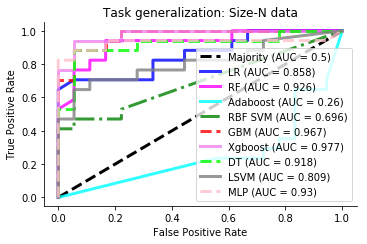

In [27]:
#Plotting the person-wise ROC curves
plotROC_task_generalize(ml_models, testY_sizeN, predicted_probs_person_sizeN, metrics_sizeN.loc['person_AUC'], data_type = 'sizeN_data', results_dir = results_dir)

### Traditional ML models for regress-N summary features 

In [28]:
data_type = 'regressN_data'
ml_models = ['logistic_regression', 'random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'decision_tree',  \
             'linear_svm', 'mlp']
metrics_regressN = pd.DataFrame(columns = ml_models) #Dataframe to store accuracies for each ML model for regressN data                                                       #For storing predicted probabilities for person (for class 1) to show ROC curves 
predicted_probs_person_regressN = pd.DataFrame(columns = ml_models) 

logistic_regression
Stride-based model performance:  0.7542857142857143 0.7698744769874477 0.6112956810631229 0.6814814814814815 0.8456356838941208
LogisticRegression(random_state=0)
Person-based model performance:  0.8 0.9166666666666666 0.6470588235294118 0.7586206896551724 0.9052287581699346


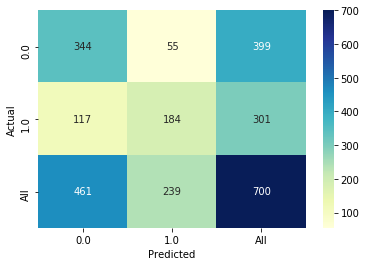

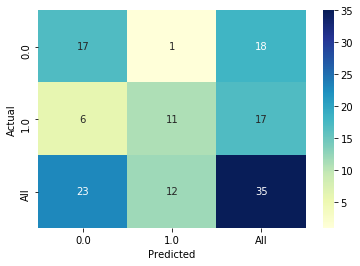

random_forest
Stride-based model performance:  0.7457142857142857 0.7157894736842105 0.6777408637873754 0.6962457337883959 0.8308229044371727
RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=0.05, n_estimators=40, random_state=0)
Person-based model performance:  0.8285714285714286 0.9230769230769231 0.7058823529411765 0.8000000000000002 0.8954248366013071


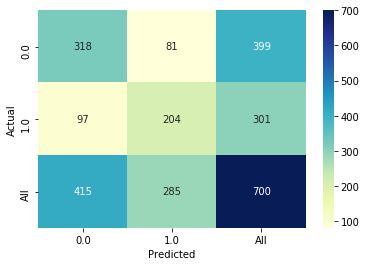

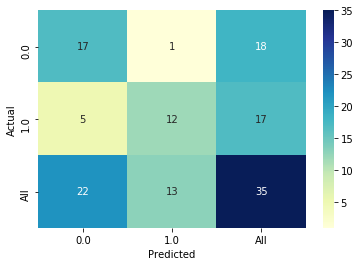

adaboost
Stride-based model performance:  0.7028571428571428 0.8120805369127517 0.4019933554817276 0.5377777777777778 0.7803645325939434
AdaBoostClassifier(learning_rate=0.1, random_state=0)
Person-based model performance:  0.6285714285714286 0.8333333333333334 0.29411764705882354 0.4347826086956522 0.8006535947712418


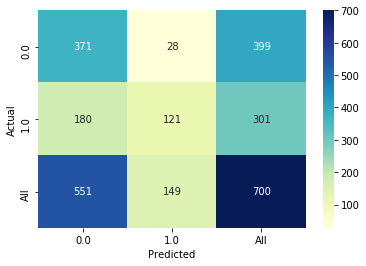

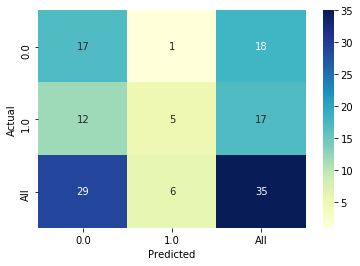

kernel_svm
Stride-based model performance:  0.6371428571428571 0.8405797101449275 0.19269102990033224 0.3135135135135136 0.6813212433076046
SVC(gamma=0.001, probability=True, random_state=0)
Person-based model performance:  0.6571428571428571 1.0 0.29411764705882354 0.45454545454545453 0.7140522875816994


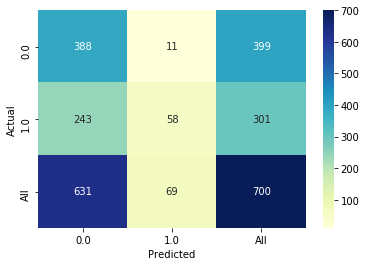

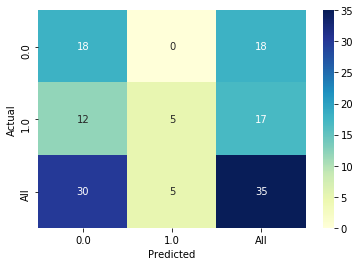

gbm
Stride-based model performance:  0.7442857142857143 0.7629310344827587 0.5880398671096345 0.6641651031894934 0.844952913846077
GradientBoostingClassifier(learning_rate=0.15, max_depth=2, max_features=4,
                           min_samples_leaf=3, n_estimators=50, random_state=0)
Person-based model performance:  0.7428571428571429 0.8333333333333334 0.5882352941176471 0.6896551724137931 0.8709150326797386


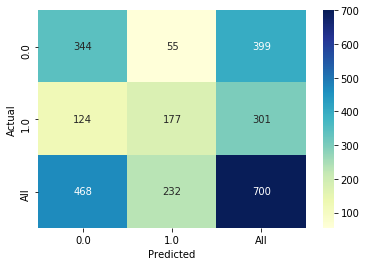

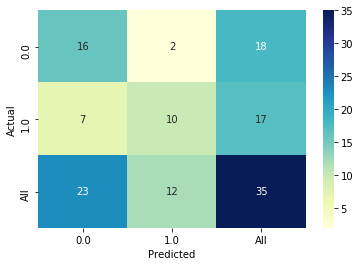

xgboost
Stride-based model performance:  0.8228571428571428 0.8416988416988417 0.7242524916943521 0.7785714285714286 0.9161441810506331
XGBClassifier(colsample_bytree=0.6, gamma=1.5, max_depth=8, min_child_weight=5,
              subsample=0.6)
Person-based model performance:  0.8857142857142857 1.0 0.7647058823529411 0.8666666666666666 0.9640522875816994


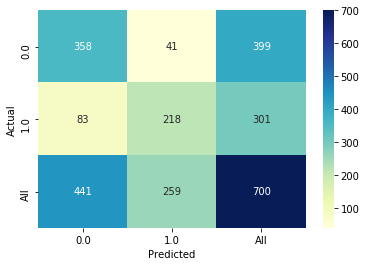

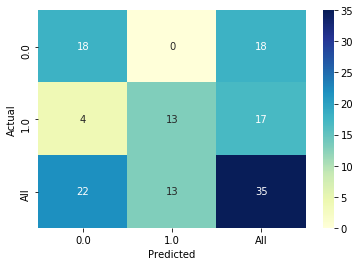

decision_tree
Stride-based model performance:  0.7514285714285714 0.6990595611285266 0.7408637873754153 0.7193548387096773 0.7553185288803402
DecisionTreeClassifier(min_samples_split=8, random_state=0)
Person-based model performance:  0.8285714285714286 0.8235294117647058 0.8235294117647058 0.8235294117647058 0.9084967320261437


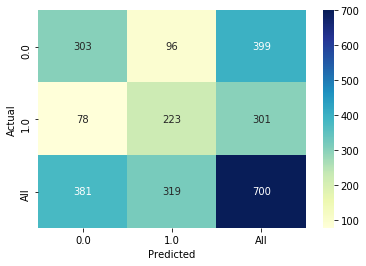

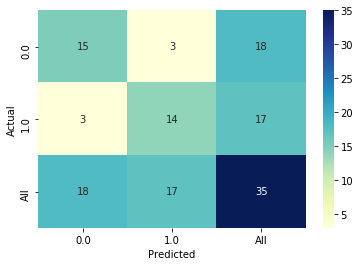

linear_svm
Stride-based model performance:  0.77 0.7777777777777778 0.6511627906976745 0.7088607594936709 0.8570096337188486
LinearSVC(random_state=0)
Person-based model performance:  0.8 0.8571428571428571 0.7058823529411765 0.7741935483870968 0.8986928104575163


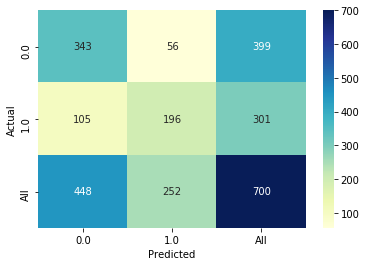

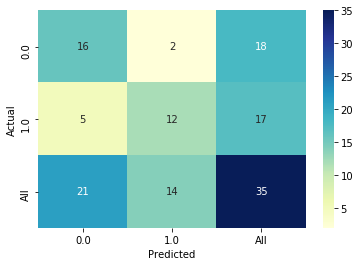

mlp
Stride-based model performance:  0.8228571428571428 0.8020477815699659 0.7807308970099668 0.7912457912457912 0.8871014746167747
MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50, 60, 50, 50, 60, 60),
              learning_rate='adaptive', max_iter=500, random_state=0,
              shuffle=False)
Person-based model performance:  0.9142857142857143 0.9375 0.8823529411764706 0.9090909090909091 0.9444444444444444


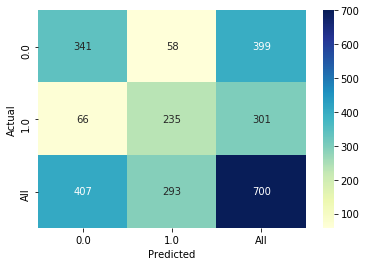

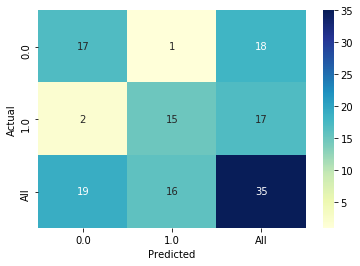

In [29]:
for ml_model in ml_models:
    print (ml_model)
    predict_probs_person_regressN, stride_person_metrics_regressN = models_task_generalize(trainX_regressN, trainY_regressN, testX_regressN, testY_regressN, ml_model, data_type, results_dir)  
    metrics_regressN[ml_model] = stride_person_metrics_regressN
    predicted_probs_person_regressN[ml_model] = predict_probs_person_regressN

metrics_regressN.index = ['sequence_accuracy', 'sequence_precision', 'sequence_recall', 'sequence_F1', 'sequence_AUC', 'person_accuracy', 
                     'person_precision', 'person_recall', 'person_F1', 'person_AUC']  
#Saving the sequence and subject-wise metrics and predicted person wise probabilities to csv files 
metrics_regressN.to_csv(results_path_task_generalize_trad + results_dir +'task_generalize_regressN_data_traditional_result_metrics.csv')
predicted_probs_person_regressN.to_csv(results_path_task_generalize_trad + results_dir + 'task_generalize_regressN_data_traditional_prediction_probs.csv')

In [30]:
metrics_regressN

,logistic_regression,random_forest,adaboost,kernel_svm,gbm,xgboost,decision_tree,linear_svm,mlp
sequence_accuracy,0.754286,0.745714,0.702857,0.637143,0.744286,0.822857,0.751429,0.770000,0.822857
sequence_precision,0.769874,0.715789,0.812081,0.840580,0.762931,0.841699,0.699060,0.777778,0.802048
sequence_recall,0.611296,0.677741,0.401993,0.192691,0.588040,0.724252,0.740864,0.651163,0.780731
sequence_F1,0.681481,0.696246,0.537778,0.313514,0.664165,0.778571,0.719355,0.708861,0.791246
sequence_AUC,0.845636,0.830823,0.780365,0.681321,0.844953,0.916144,0.755319,0.857010,0.887101
person_accuracy,0.800000,0.828571,0.628571,0.657143,0.742857,0.885714,0.828571,0.800000,0.914286
person_precision,0.916667,0.923077,0.833333,1.000000,0.833333,1.000000,0.823529,0.857143,0.937500
person_recall,0.647059,0.705882,0.294118,0.294118,0.588235,0.764706,0.823529,0.705882,0.882353
person_F1,0.758621,0.800000,0.434783,0.454545,0.689655,0.866667,0.823529,0.774194,0.909091
person_AUC,0.905229,0.895425,0.800654,0.714052,0.870915,0.964052,0.908497,0.898693,0.944444


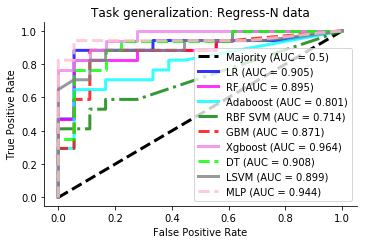

In [31]:
#Plotting the person-wise ROC curves
plotROC_task_generalize(ml_models, testY_regressN, predicted_probs_person_regressN, metrics_regressN.loc['person_AUC'], data_type = 'regressN_data', results_dir = results_dir)